In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Base Libraries
import pandas as pd
import numpy as np
import yfinance as yf
from functools import partial
import matplotlib.pyplot as plt
# Classifier
from sklearn.svm import SVC
# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit
)
# Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    RocCurveDisplay,
    ConfusionMatrixDisplay,
    log_loss
)

In [4]:
ticker = '000001.SS'
df = yf.download(ticker, start='2016-01-01')
df = pd.DataFrame(df).dropna()
# Check the output
df.tail(30)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-24,3029.403076,3045.639893,3019.124023,3044.822021,3044.822021,305300
2024-04-25,3037.927002,3060.263916,3034.649902,3052.899902,3052.899902,292300
2024-04-26,3054.979004,3092.429932,3054.979004,3088.635986,3088.635986,439400
2024-04-29,3086.681885,3119.686035,3080.585938,3113.042969,3113.042969,506900
2024-04-30,3110.158936,3123.288086,3104.293945,3104.824951,3104.824951,440200
2024-05-06,3132.511963,3142.382080,3126.769043,3140.719971,3140.719971,450700
2024-05-07,3139.664062,3151.218994,3133.689941,3147.738037,3147.738037,379100
2024-05-08,3141.487061,3144.986084,3126.173096,3128.479980,3128.479980,334000
2024-05-09,3128.164062,3158.465088,3128.164062,3154.320068,3154.320068,360900


In [5]:
 # Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2046 entries, 2016-01-04 to 2024-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2046 non-null   float64
 1   High       2046 non-null   float64
 2   Low        2046 non-null   float64
 3   Close      2046 non-null   float64
 4   Adj Close  2046 non-null   float64
 5   Volume     2046 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 111.9 KB


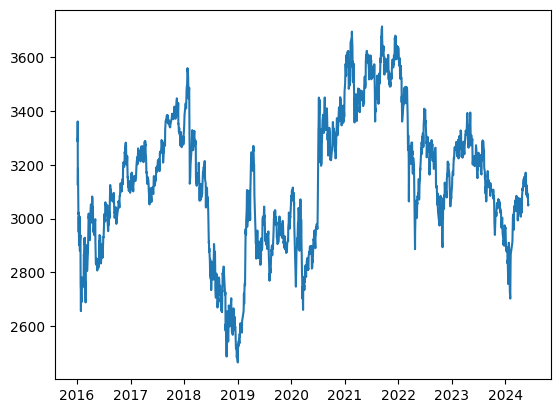

In [6]:
df.info()
# Visualize data
plt.plot(df['Adj Close'])

In [14]:
# Create Features
df['HC'] = df['High'] - df['Adj Close']
df['Sign'] = np.sign(np.log(df['Adj Close'] / df['Adj Close'].shift(1)))
df['RET'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
for i in[5, 10, 20, 60, 120]:
    df['VMA' + '_' + str(i)] = df['Volume'] / df['Volume'].rolling(i).mean()
df['OC'] = df['Open'] - df['Adj Close']
df['OC7'] = df['OC'].rolling(7).mean()
df['OC14'] = df['OC'].rolling(14).mean()
df['HL'] = df['High'] - df['Low']
df['HC7'] = df['HL'].rolling(7).mean()
df['HC4'] = df['HL'].rolling(7).mean()
df['STD'] = df['RET'].rolling(7).std()
for i in[5, 10, 20, 60, 120]:
    df['SMA' + '_' + str(i)] = df['Adj Close'].rolling(window=i).mean()
for i in[5, 10, 20, 60, 120]:
    df['EMA' + '_' + str(i)] = df['Adj Close'].ewm(span=i, adjust=False).mean()
for i in[5, 10, 20, 60, 120]:
    df['Momentum_' + '_' + str(i)] = df['Adj Close'] - df['Adj Close'].shift(i)
df.dropna(inplace=True)
features = df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1)
features.head(2)

,HC,Sign,RET,MA7,VMA,OC,OC7,OC14,HL,HC7,...,Momentum__5,Momentum__10,Momentum__20,Momentum__60,Momentum__120,VMA_5,VMA_10,VMA_20,VMA_60,VMA_120
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-14,35.423096,-1.0,-0.015421,0.996515,1.180148,33.541992,5.461321,0.269444,35.423096,25.579276,...,-12.146973,5.552979,-85.369141,-92.836914,-282.069092,1.186951,1.045653,0.951480,0.929941,1.032604
2018-12-17,0.992920,1.0,0.001631,0.998536,0.977054,-10.711182,0.411272,-1.291853,25.100098,24.801304,...,13.392090,-56.823975,-105.537842,-83.668945,-291.785889,0.948610,0.899479,0.795258,0.746906,0.831322


In [15]:
def correlated_features(data, threshold=0.9):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
# total correlated features
drop_correlated_features = correlated_features(features)
# drop the highly correlated features
features.drop(drop_correlated_features, axis=1,inplace=True)
# record feature names
feature

In [11]:
X = features.values

In [12]:
# Specify y
y = np.where(df['Close'].shift(-1)>1.0025*df['Close'],1,0)

In [13]:
 # Check Class Imbalance
pd.Series(y).value_counts()

0    1257
1     757
Name: count, dtype: int64

In [14]:
 # Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
# Define a Baseline Model
classifier = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", SVC(kernel='rbf'))
])
classifier.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [16]:
# Verify Class Labels
classifier.classes_

array([0, 1])

In [17]:
 # Predict the Class Labels
y_pred = classifier.predict(X_test)
y_pred[-20:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# Get the Scores
acc_train = accuracy_score(y_train, classifier.fit(X_train, y_train). predict(X_train))
acc_test = accuracy_score(y_test, classifier.predict(X_test))
print(f'Baseline Model -- Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Baseline Model -- Train Accuracy: 0.6487, Test Accuracy: 0.665


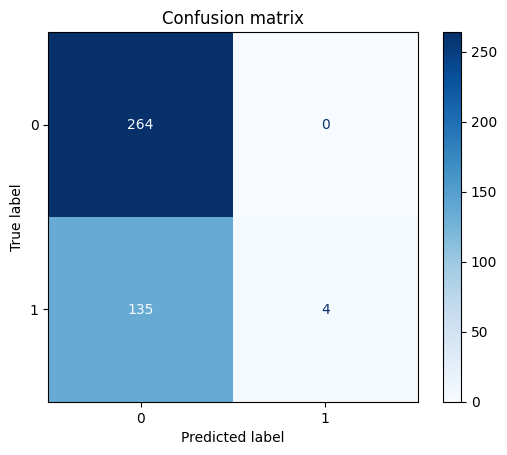

In [19]:
 # Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
classifier,
X_test,
y_test,
# display_labels=model.classes_,
cmap=plt.cm.Blues
)
plt.title('Confusion matrix')
plt.show()

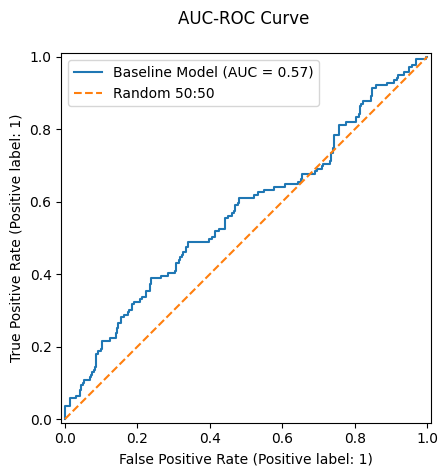

In [20]:
# Display ROCCurve
disp = RocCurveDisplay.from_estimator(
classifier,
X_test,
y_test,
name='Baseline Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

In [21]:
classifier.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('classifier', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

In [76]:
# Use Optuna for Tuning
import optuna

In [77]:
# Define Objective Function
def optimize(trial, x, y):
    # specify params range
    tolerance = trial.suggest_float("tol", 0.001, 0.01, log=True)
    regularization = trial.suggest_float('C', 0.001, 10, log=True)
    model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(
    C=regularization,
    tol=tolerance,
    kernel='sigmoid'))
    ])
    tscv = TimeSeriesSplit(n_splits=2, gap=1)
    ll = []
    for idx in tscv.split(x):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        ll.append(log_loss(ytest, preds))
    return -1.0 * np.mean(ll)

In [78]:
 # Create a Study
study = optuna.create_study(
study_name='hp_lr',
direction='minimize'
)

[I 2024-05-28 00:28:12,879] A new study created in memory with name: hp_lr


In [79]:
# Specify Optimization function
optimization_function = partial(optimize, x=X, y=y)
study.optimize(optimization_function, n_trials=50)

[I 2024-05-28 00:28:12,978] Trial 0 finished with value: -18.281564773304986 and parameters: {'tol': 0.008399446861422197, 'C': 2.5480456467215027}. Best is trial 0 with value: -18.281564773304986.
[I 2024-05-28 00:28:13,042] Trial 1 finished with value: -17.14271319726303 and parameters: {'tol': 0.004543371922787306, 'C': 0.6855324560347636}. Best is trial 0 with value: -18.281564773304986.
[I 2024-05-28 00:28:13,151] Trial 2 finished with value: -14.884989897390398 and parameters: {'tol': 0.003120410680353551, 'C': 0.002252473286430278}. Best is trial 0 with value: -18.281564773304986.
[I 2024-05-28 00:28:13,230] Trial 3 finished with value: -18.361484182150036 and parameters: {'tol': 0.00689594082206208, 'C': 5.68197201875065}. Best is trial 3 with value: -18.361484182150036.
[I 2024-05-28 00:28:13,328] Trial 4 finished with value: -15.724143690263412 and parameters: {'tol': 0.0019104553168175717, 'C': 0.24162492035020072}. Best is trial 3 with value: -18.361484182150036.
[I 2024-05

In [80]:
# Get the Best Params
print(f'Best Params: {study.best_params}, Best Value: {study.best_value}')

Best Params: {'tol': 0.0026952324011459915, 'C': 4.030531608563452}, Best Value: -18.86098048743159


In [81]:
 # plot Optimization History
optuna.visualization.plot_optimization_history(study)

In [82]:
# Plot Param Importances
optuna.visualization.plot_param_importances(study)

In [83]:
 # Scale and fit the model
clf = Pipeline([
("scaler", StandardScaler()),
("estimator", SVC(
tol=study.best_params['tol'],
C=study.best_params['C'],
kernel='sigmoid',
))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 SVC(C=4.030531608563452, kernel='sigmoid',
                     tol=0.0026952324011459915))])

In [84]:
# Predict Class Labels
y_pred = clf.predict(X_test)
# Predict Probabilities for upside
# y_proba = model.best_estimator_.predict_proba(X_test)[:,1]
# Measure Accuracy
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t:{acc_test :0.4}')


 Training Accuracy 	: 0.5152 
 Test Accuracy 		:0.5277


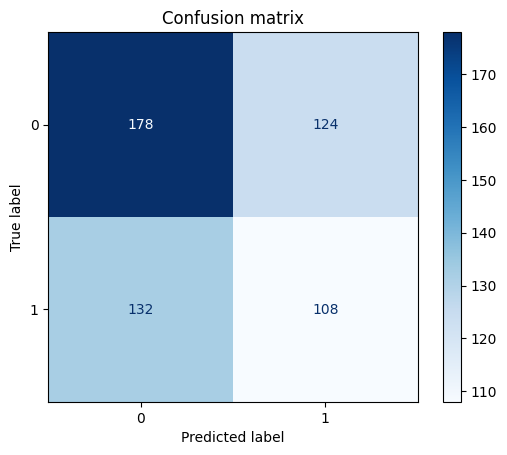

In [85]:
 # Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
clf,
X_test,
y_test,
# display_labels=model.classes_,
cmap=plt.cm.Blues
)
plt.title('Confusion matrix')
plt.show()

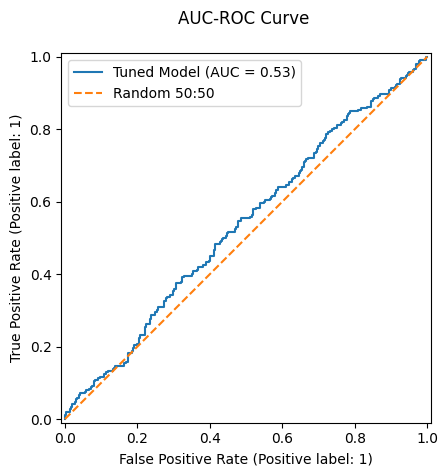

In [86]:
 # Display ROCCurve
disp = RocCurveDisplay.from_estimator(
clf,
X_test,
y_test,
name='Tuned Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

In [87]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       302
           1       0.47      0.45      0.46       240

    accuracy                           0.53       542
   macro avg       0.52      0.52      0.52       542
weighted avg       0.53      0.53      0.53       542

